In [77]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
 """))

<span style="color:red; font-size: 35px; font-weight: bold;"> 데이터 시각화 </span></br>
- 시각화 라이브러리 : matplotlib(데이터시각화), seaborn(데이터시각화), folium(지도시각화)
    * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
    * seaborn : matplotlib기반으로 다양한 색, 테마, 차트 기능과 groupby기능이 포함된 라이브러리
    

# 1절. matplotlib 
- https://pypi.org/project/matplotlib
- https://matplotlib.org/stable/api/index

In [79]:
import matplotlib
matplotlib.__version__


'3.7.0'

## 1.1 패키지  import 및 기본설정

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns 

%config InlineBackend.figure_format = 'retina' 
#한글설정

#warning(경고) 안보이게


## 1.2 그래프 그리기
- <font color='red'> <strong> matplotlib으로 그래프 그리기 위한 단계 </strong></font>
    1. 데이터 준비 
    2. 그래프 생성
    3. 그래프 함수로 그리기 (함수 호출)
    4. 그래프 커스터마이징
    5. 그래프 출력 및 저장

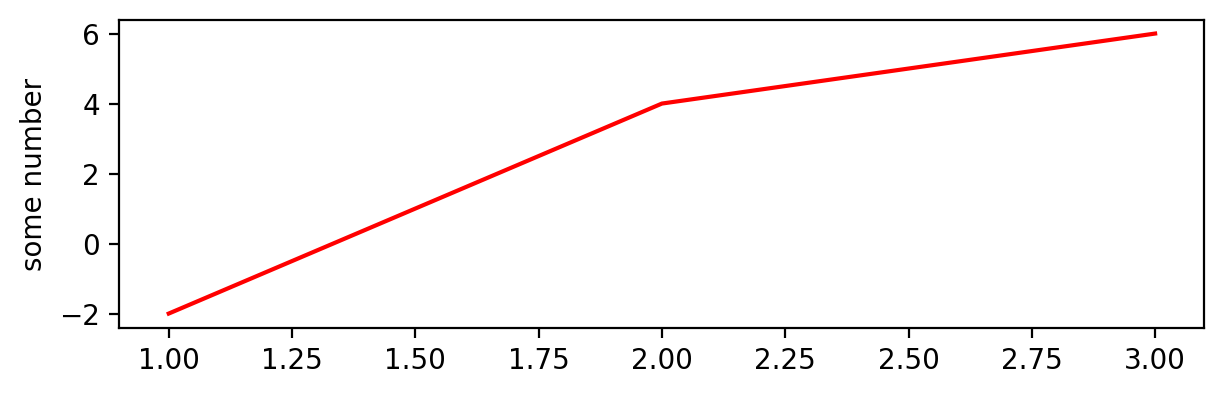

In [82]:
x = [1, 2, 3] #1)데이터 준비
y = [-2, 4, 6]
plt.figure(figsize=(7,2)) #2단계 그래프 객체 생성
plt.plot(x,y, color='r') #그래프 함
plt.ylabel('some number') # 그래프 커스터마이징
plt.show() #화면 출력 cf)plt.savefig('파일명.jpg,png')

## 1.3 그래프 영역 나누기
### 1) subplot()함수로 서브플롯 추가

In [83]:
# 여러개 그래프를 영역을 나눠서 그리기 (1)
import numpy as np
x = np.arange(0,10,0.01)
len(x)


1000

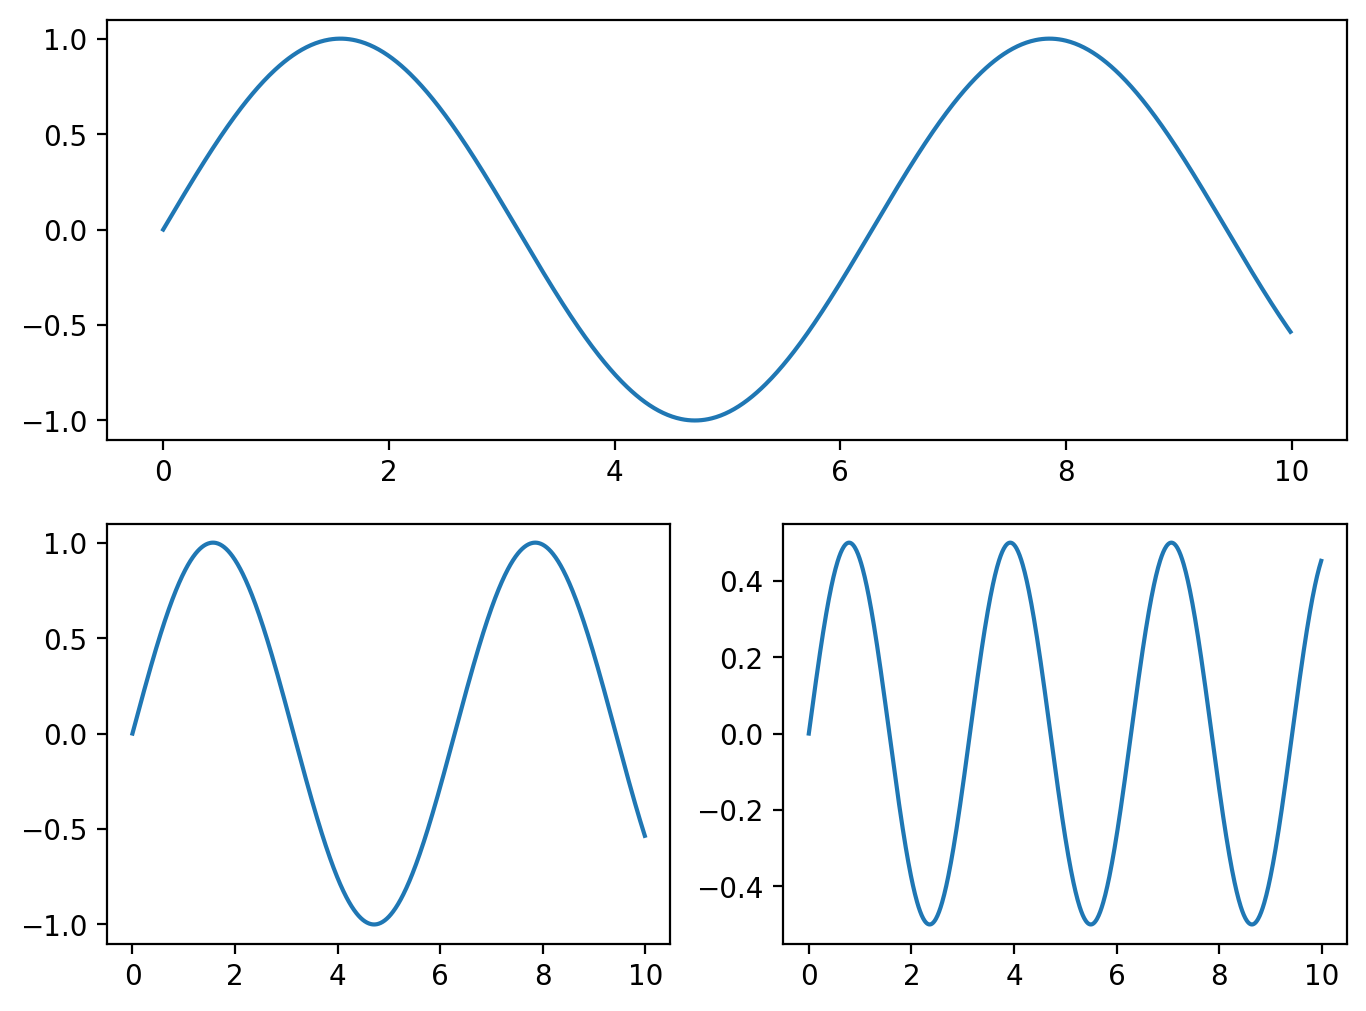

In [84]:
plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1); plt.plot(x, np.sin(x))   #2행 1열에 첫번째 그래프
plt.subplot(2, 2, 3); plt.plot(x, np.sin(x))
plt.subplot(224); plt.plot(x, np.sin(x)*np.cos(x))

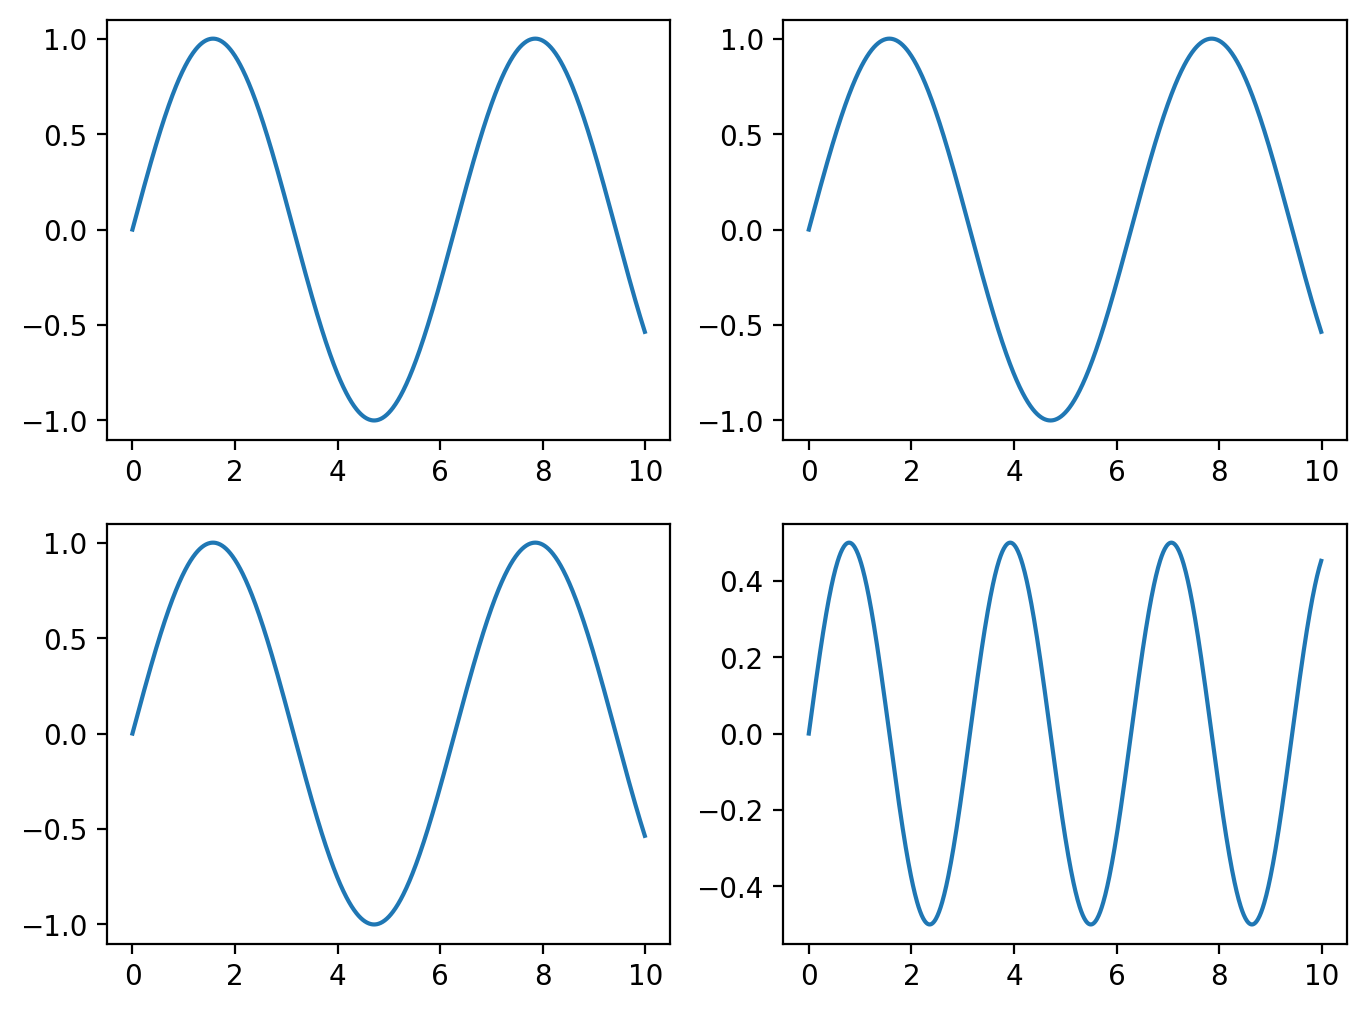

In [85]:
plt.figure(figsize=(8,6))
plt.subplot(2, 2, 1); plt.plot(x, np.sin(x))   #2행 1열에 첫번째 그래프
plt.subplot(2, 2, 2); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 4); plt.plot(x, np.sin(x)*np.cos(x))

### 2) subplots()함수로 서브플롯 추가 (ch12  교안 14p)
https://wikidocs.net/92085

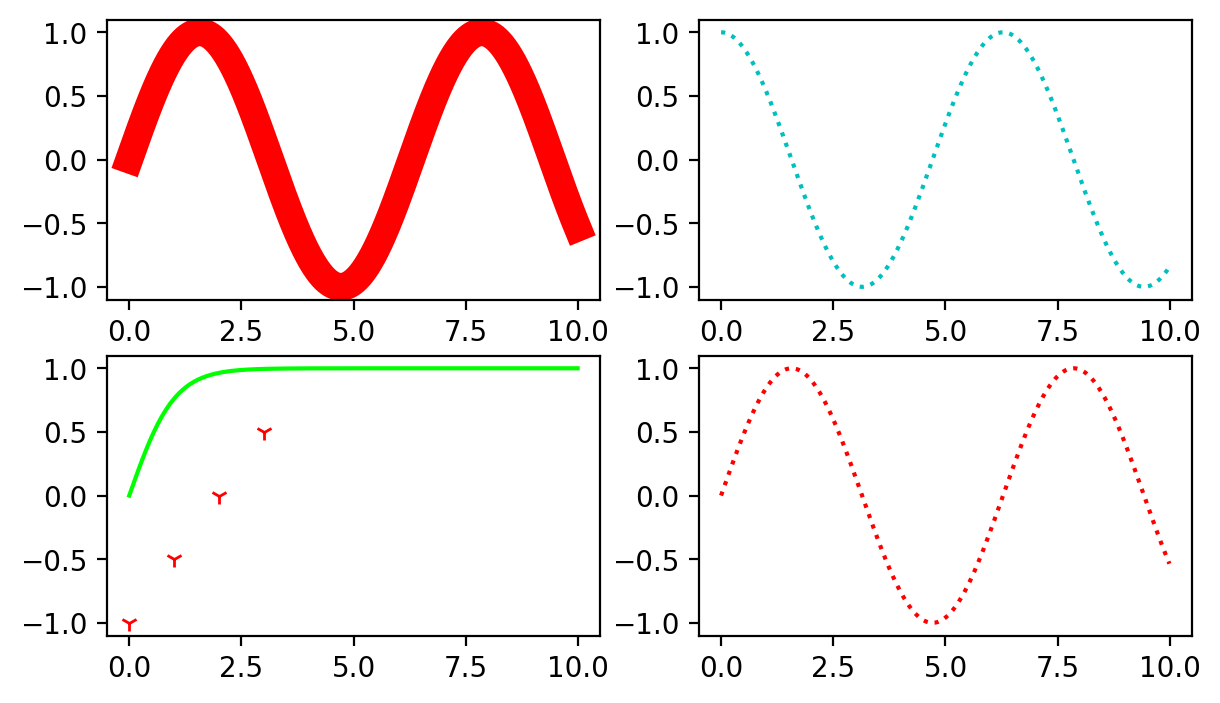

In [86]:
#2행 2열 서브플롯
fig , axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4)) #2차원
axes[0,0].plot(x, np.sin(x), 'r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c:') #color='c', linestyle=':','--','-'
axes[1,0].plot([0, 1, 2, 3],[-1, -0.5, 0, 0.5], 'r1')
axes[1,0].plot(x, np.tanh(x), '#00FF00')
axes[1,1].plot(x, np.sin(x),'r:')
plt.show()

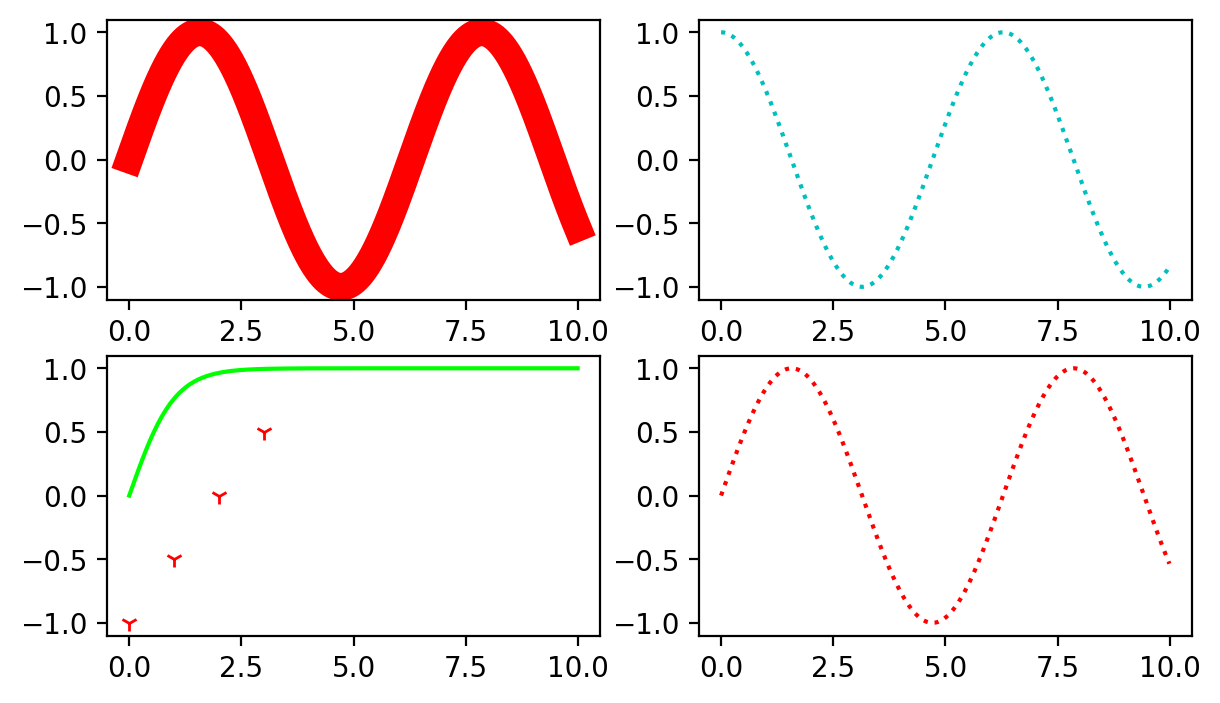

In [87]:
import numpy as np
fig

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

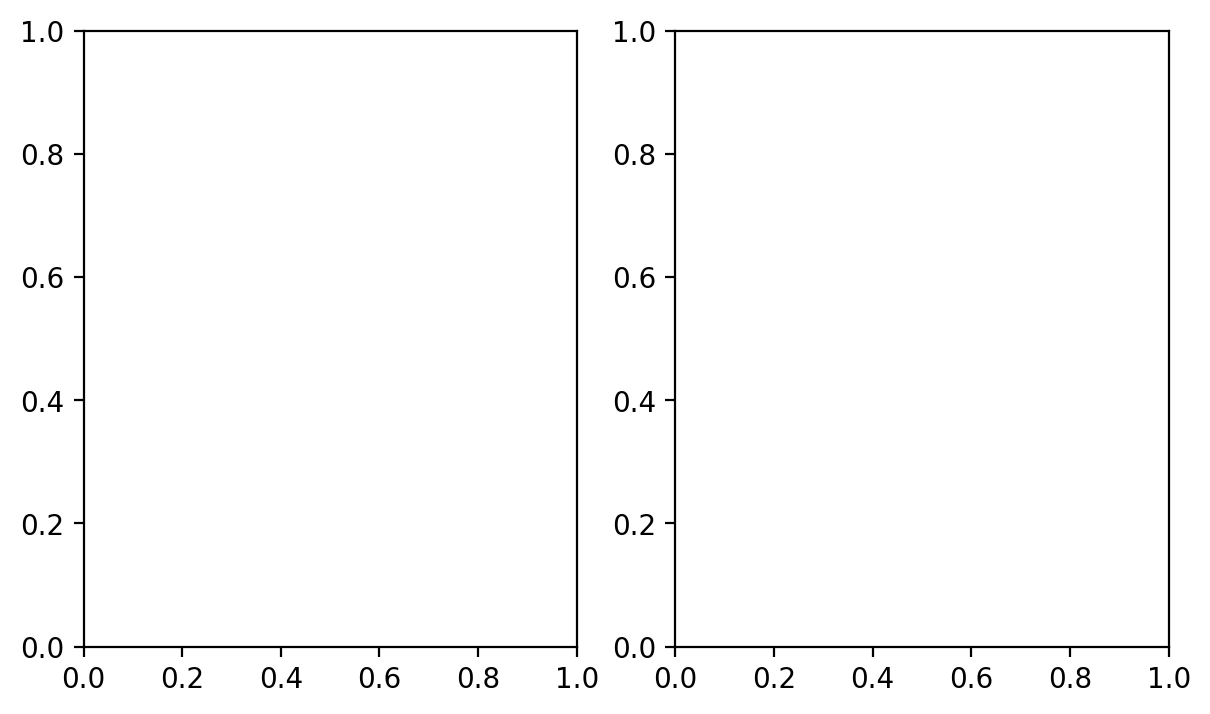

In [88]:
#1행 2열 서브플롯
fig , axes = plt.subplots(ncols=2, figsize=(7,4)) #1차원 (rows나 cols가 1이면 1차원)/ 기본1 
axes[0,0].plot(x, np.sin(x), 'r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c:') #color='c', linestyle=':','--','-'
axes

### 3) pandas.DataFrame.plot() 
- plt.plot(x,y, fmt)
- df.plot(x=열이름,y=열이름, kind='line',figsize, title, xlim, ylim...)
    * kind : line(기본값), scatter(점도표), bar(막대), barh, box, pie, density,...)
    * xlim, ylim : list/tuple

In [ ]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample()

In [89]:
# 범례 


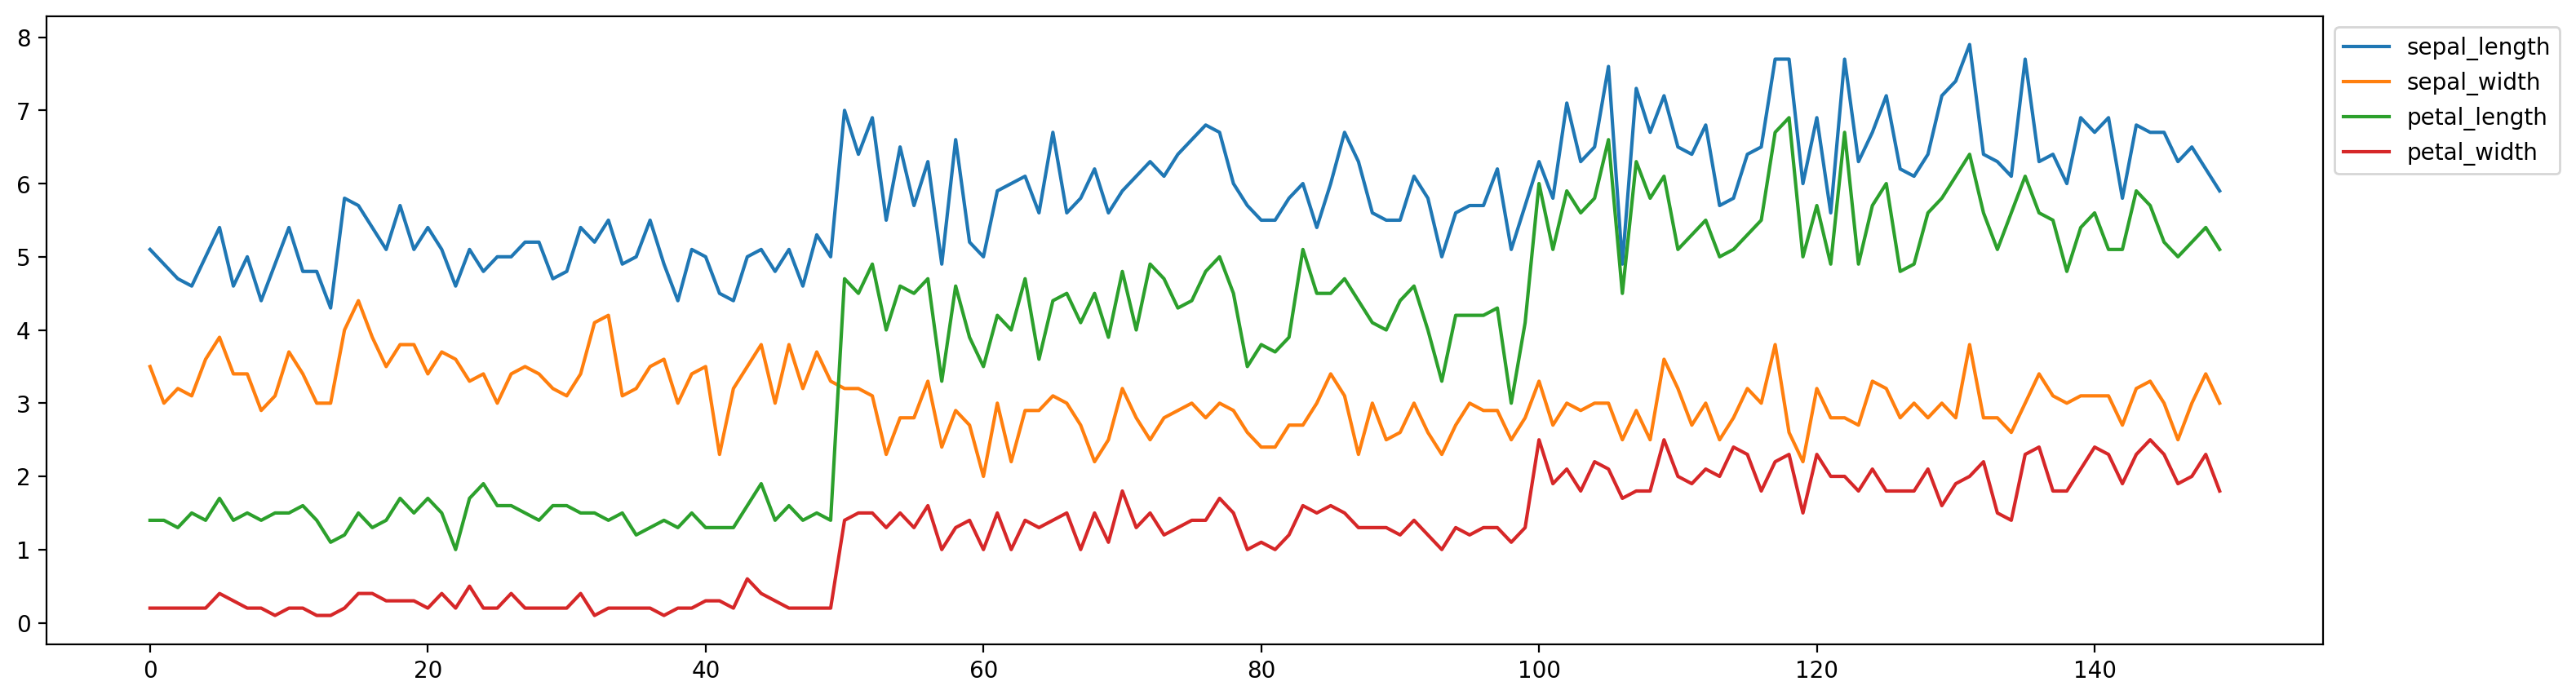

In [90]:
g = iris.plot(kind='line', figsize=(18,5))
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
# plt.savefig('data/ch12_iris.jpg')
plt.show()

<Axes: xlabel='petal_length'>

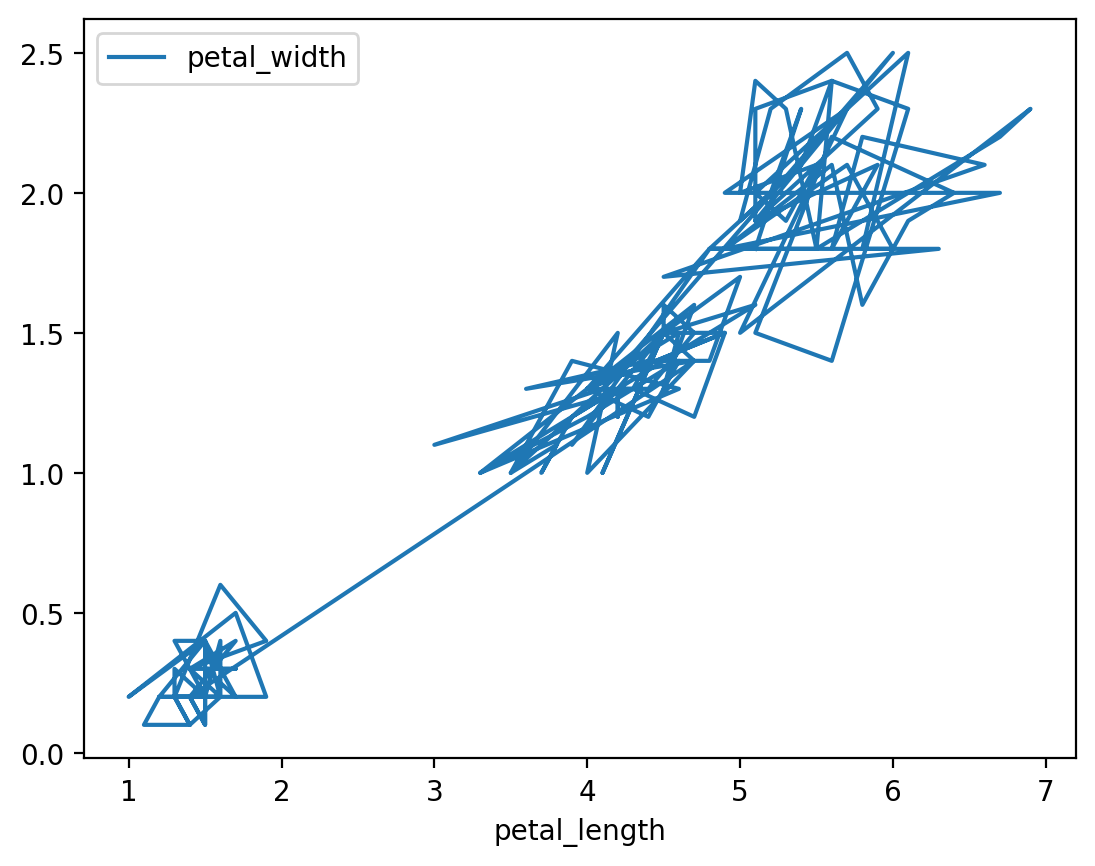

In [91]:
iris.plot(x='petal_length',y='petal_width')

In [92]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


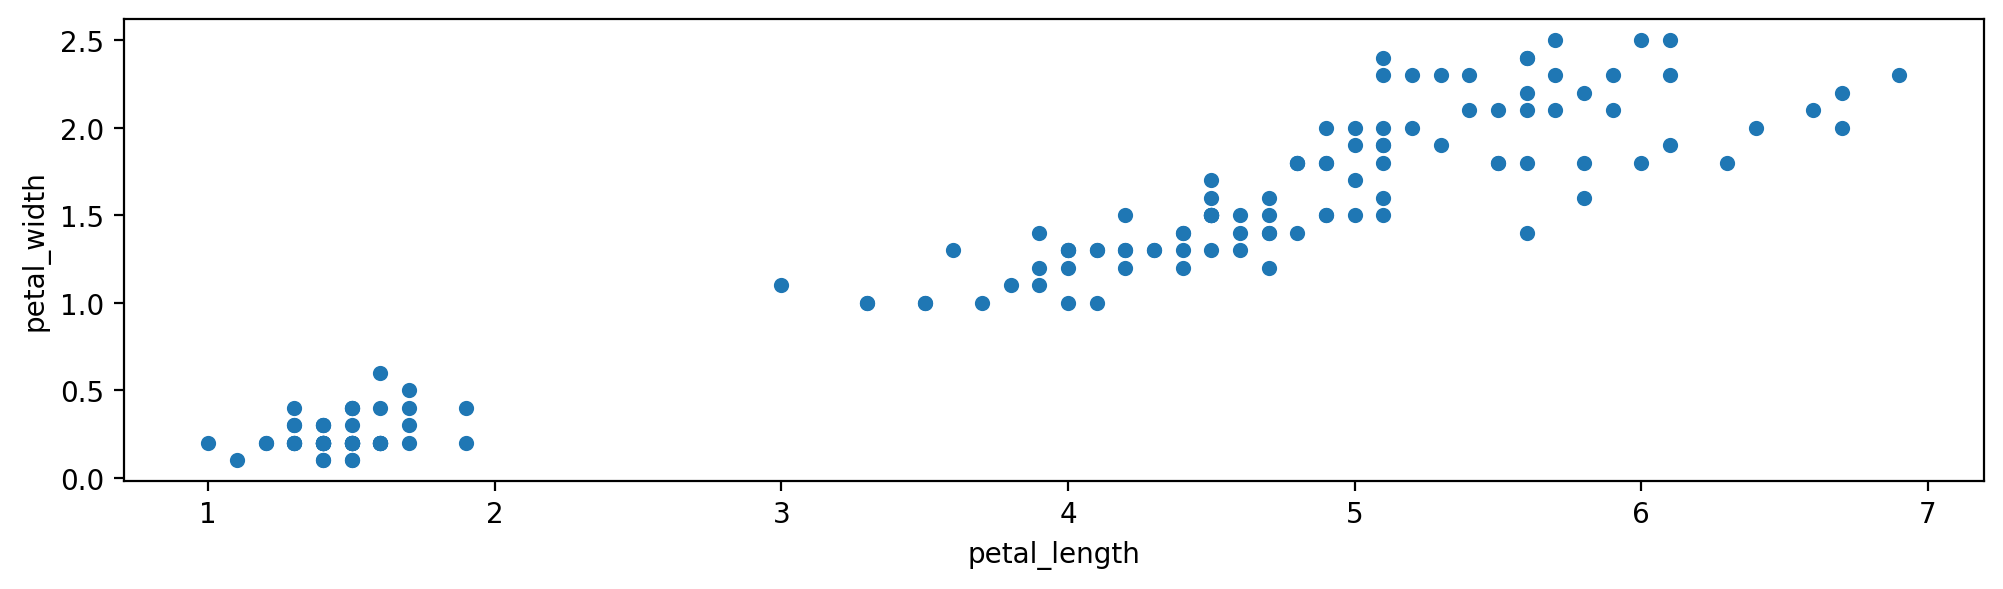

In [93]:
iris.plot(x='petal_length', y='petal_width', kind='scatter', figsize=(12,3))
plt.show()

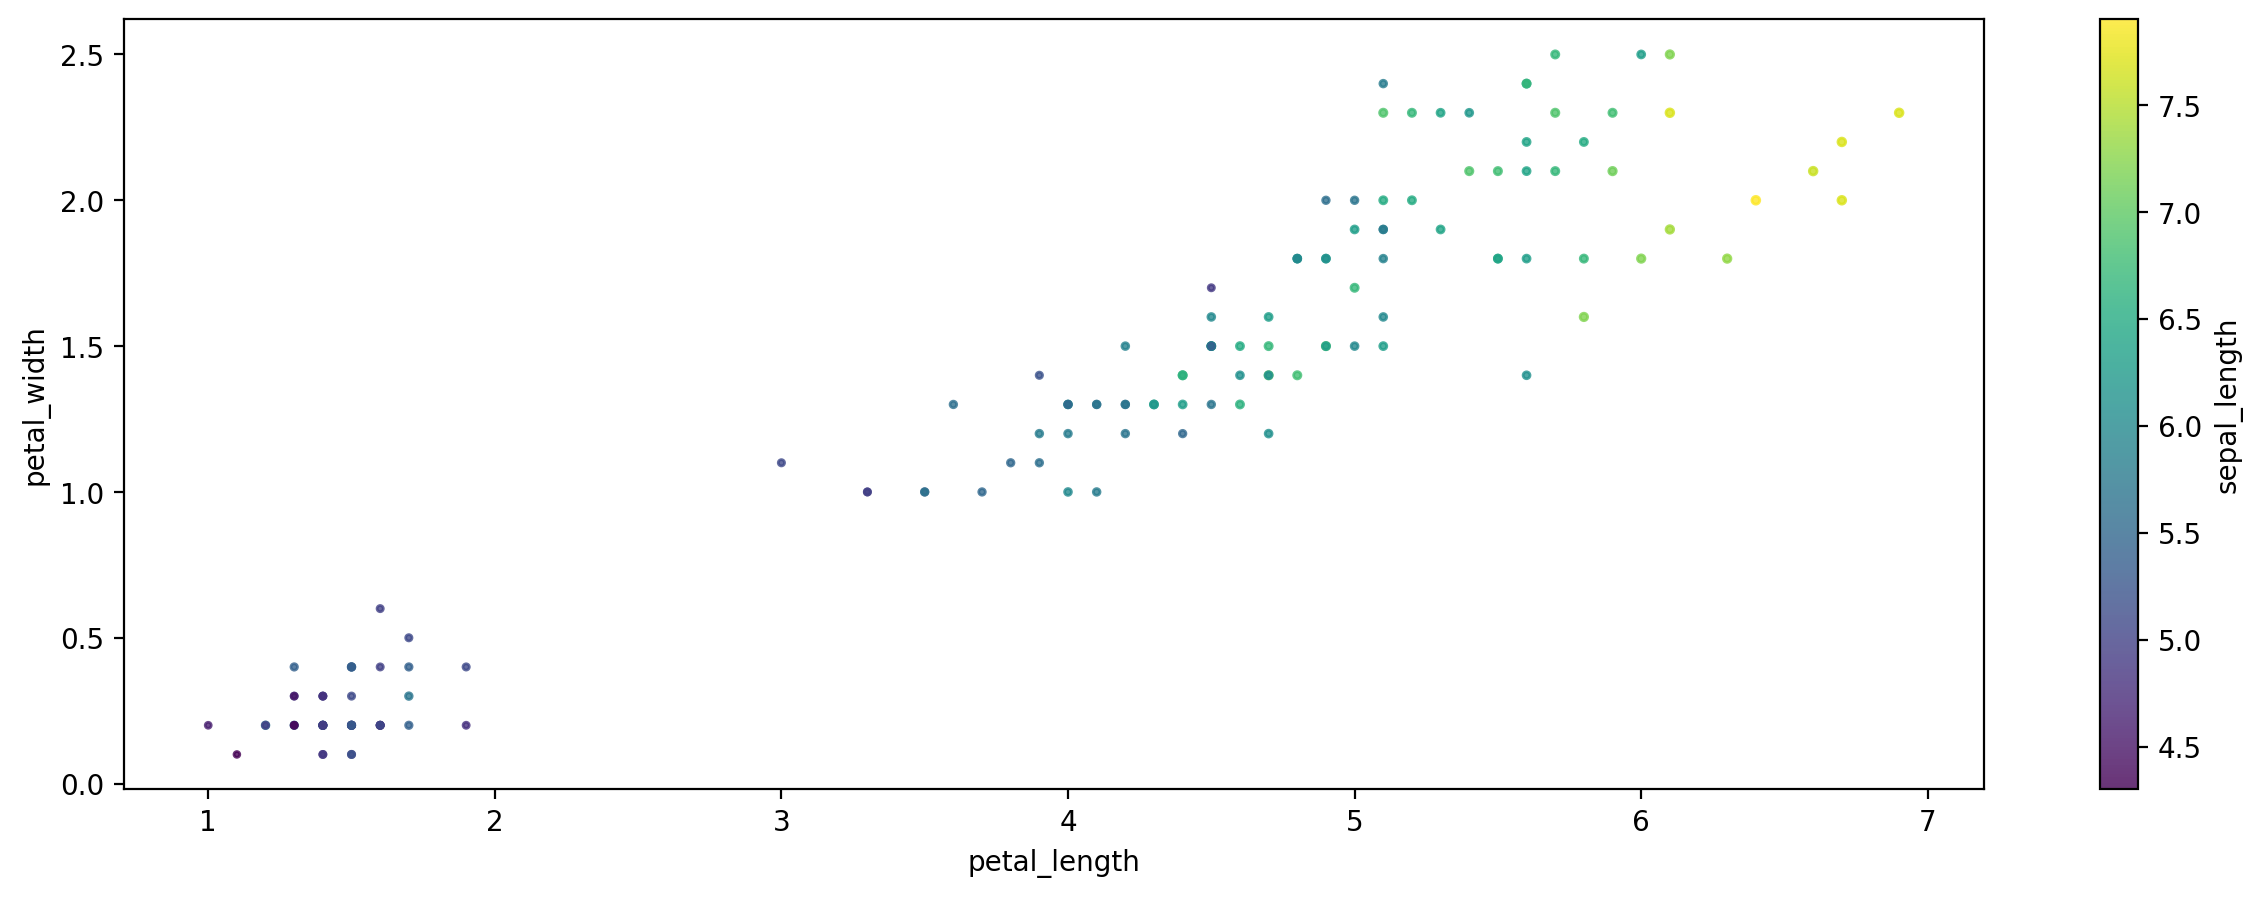

In [94]:
iris.plot(kind='scatter',
          x='petal_length',
          y='petal_width',
          figsize=(15,5),
          s='sepal_length', #size
          c='sepal_length', #color
          alpha=.8) #0<=투명도<=1
plt.show()

#### 1)) boxplot

<Axes: >

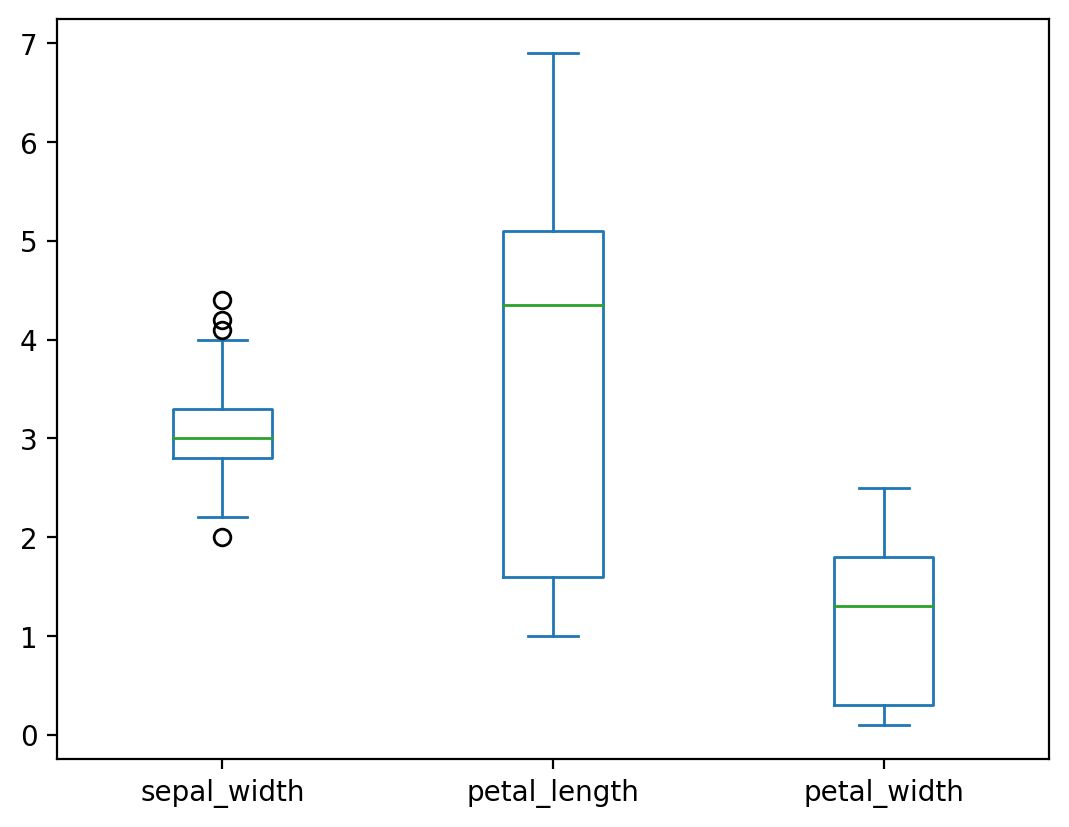

In [95]:
iris.plot(kind='box', x='sepal_length')

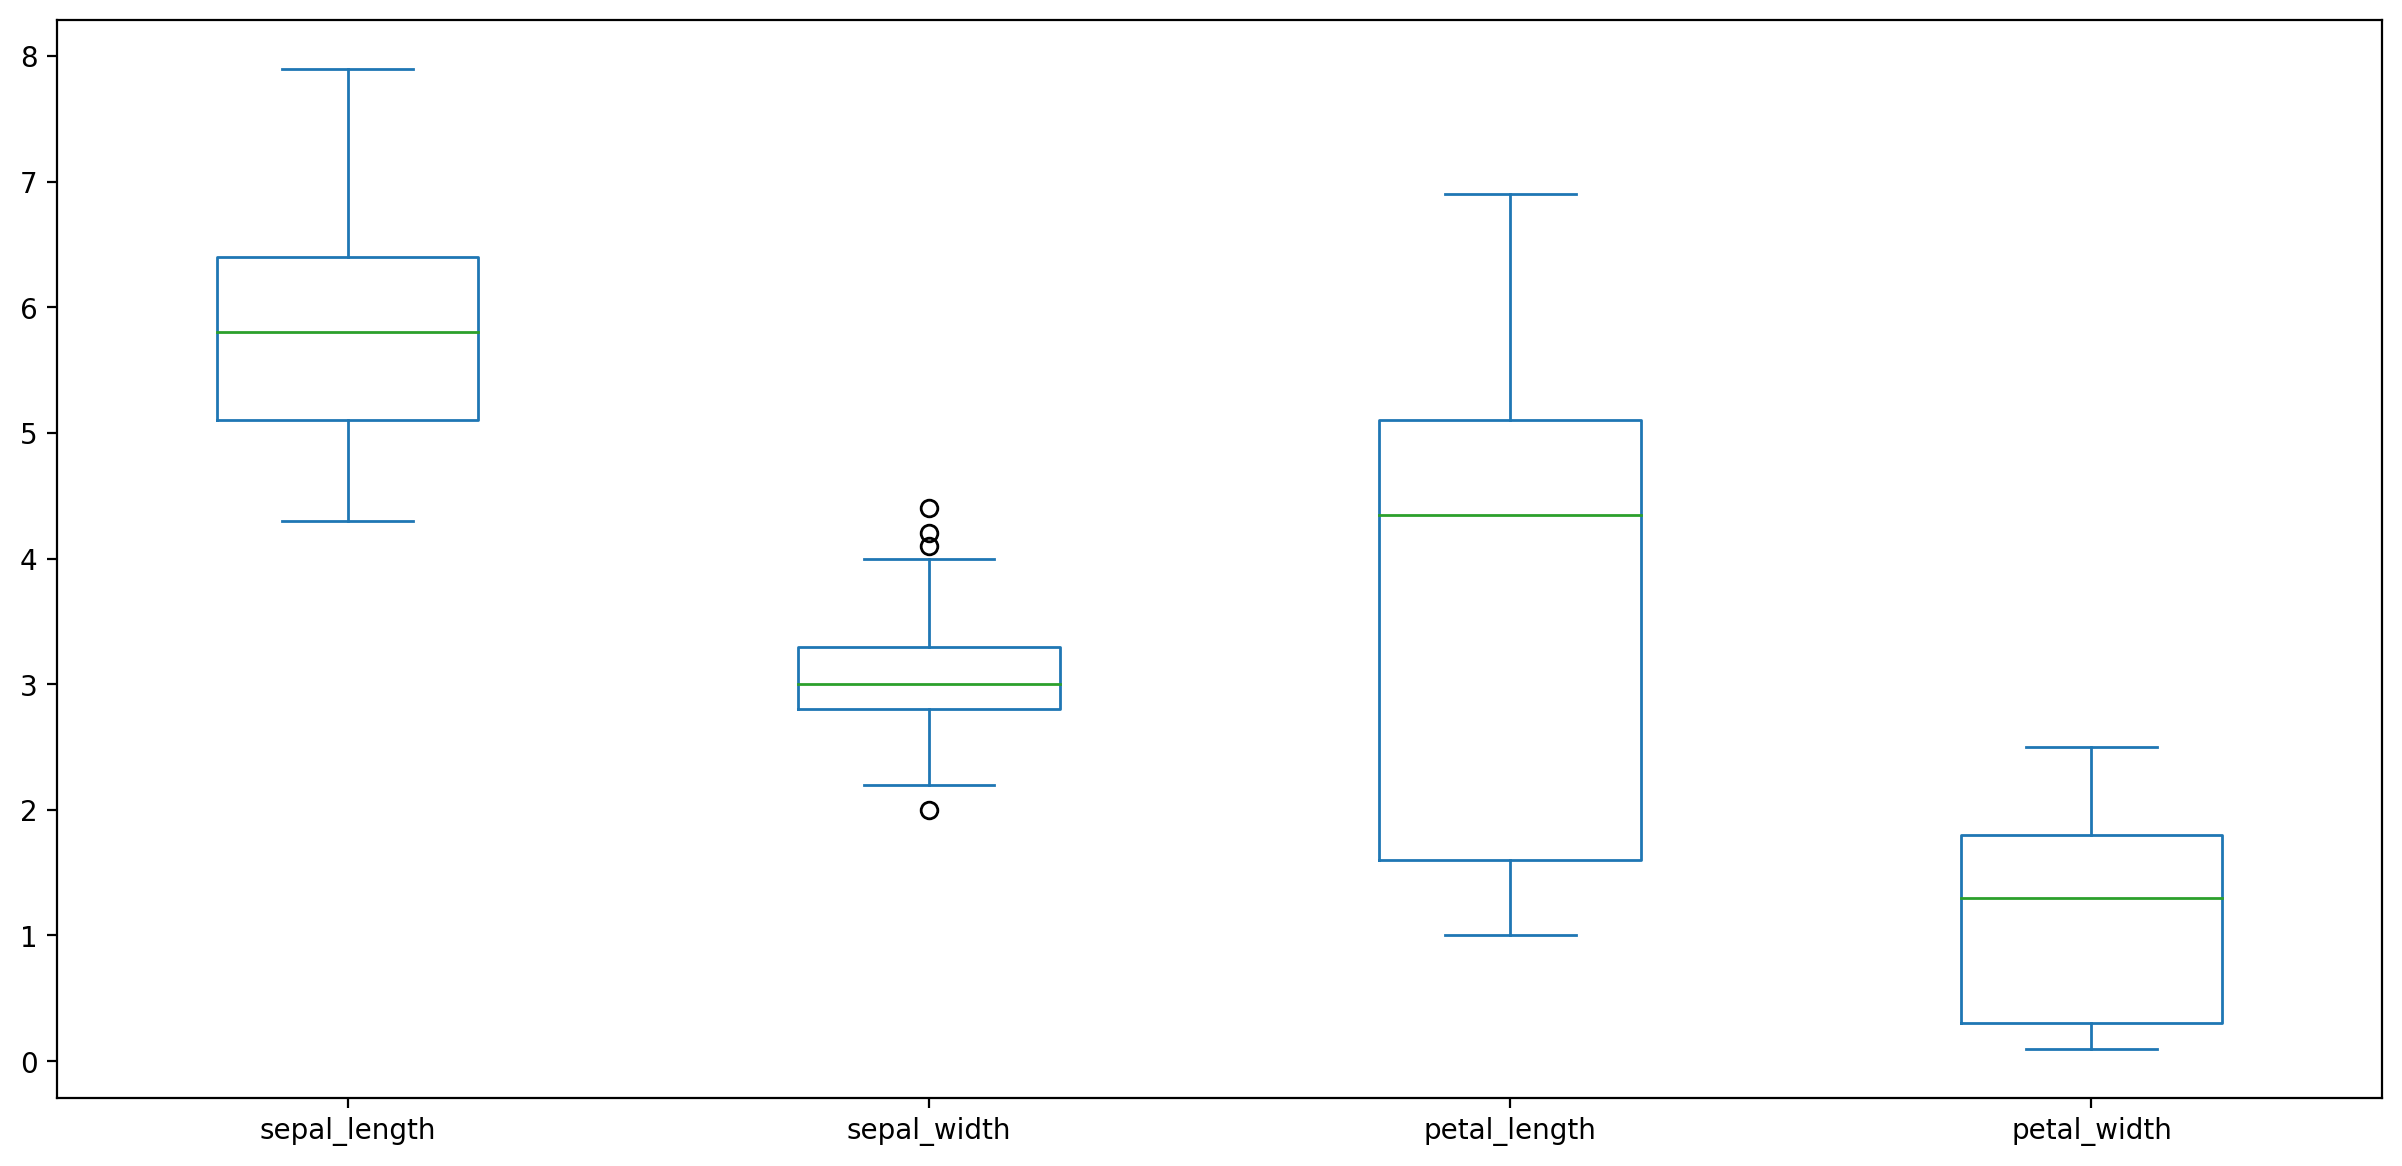

In [96]:
#모든 열의 boxplot의 값
iris.plot(kind='box', figsize=(15,7))
plt.show()
#미니멈값이 이상치보다 적게 있으면 미니멈값으로 나타남 
#sepal_width는 미니멈값이 이상치보다 더 큰 도표 o 

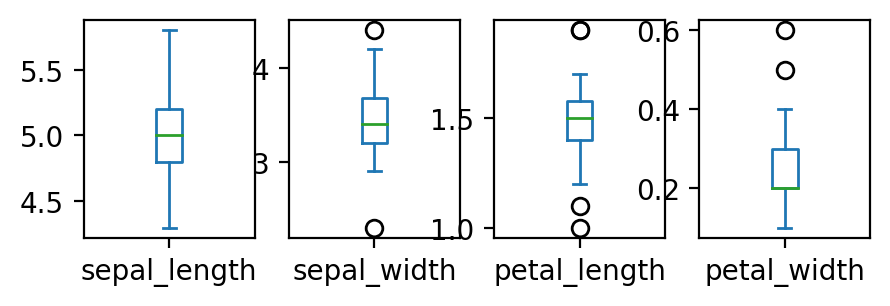

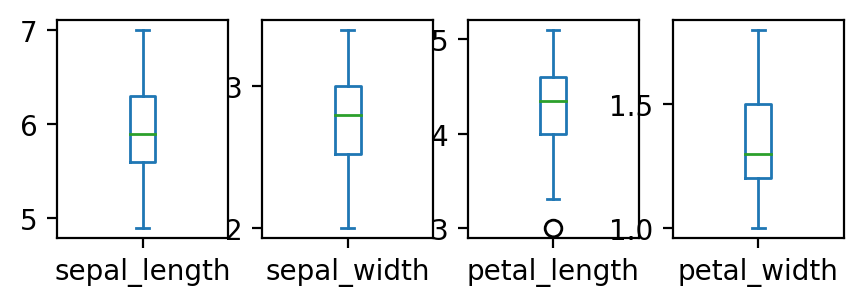

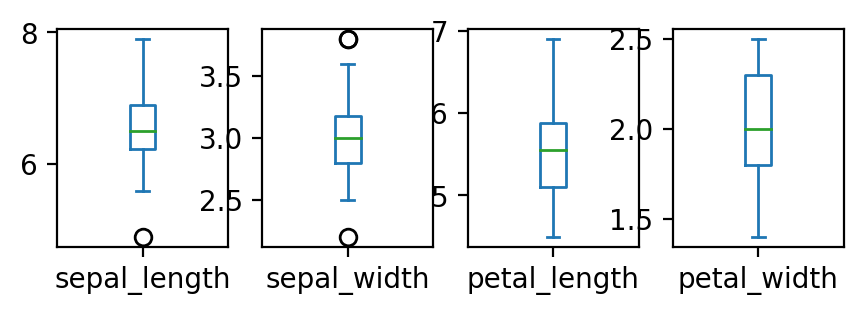

In [97]:
#종별boxplot
iris.groupby('species').plot(kind='box',
                            subplots=True,
                            layout=(3,5),
                            sharex=True) #x축공유
plt.show()

## 1.4 다양한 그래프 그리기
- pyplot 함수들 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
### 1)plt.scatter():산점도

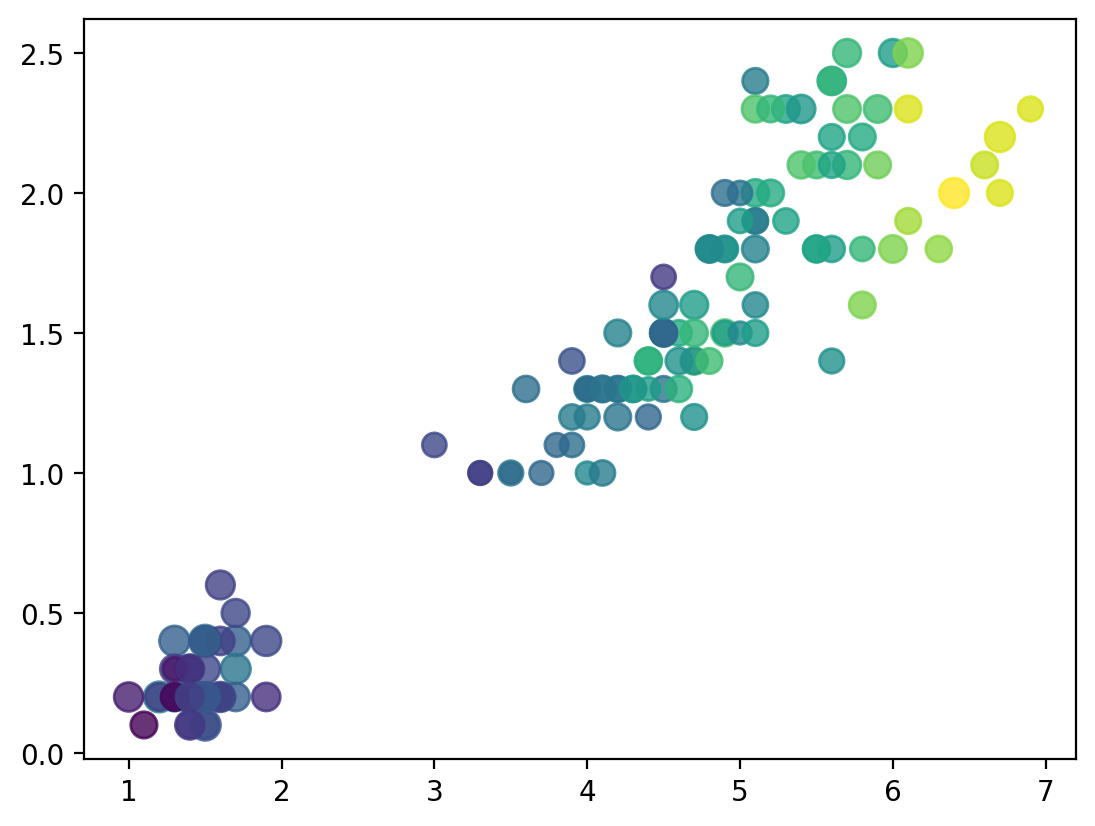

In [100]:
plt.scatter(iris.petal_length, iris.petal_width,
           s=iris.sepal_width*30,
           c=iris.sepal_length*20,
           alpha=.8)

### 2) boxplot(단점:분포를 몰라),violinplot()

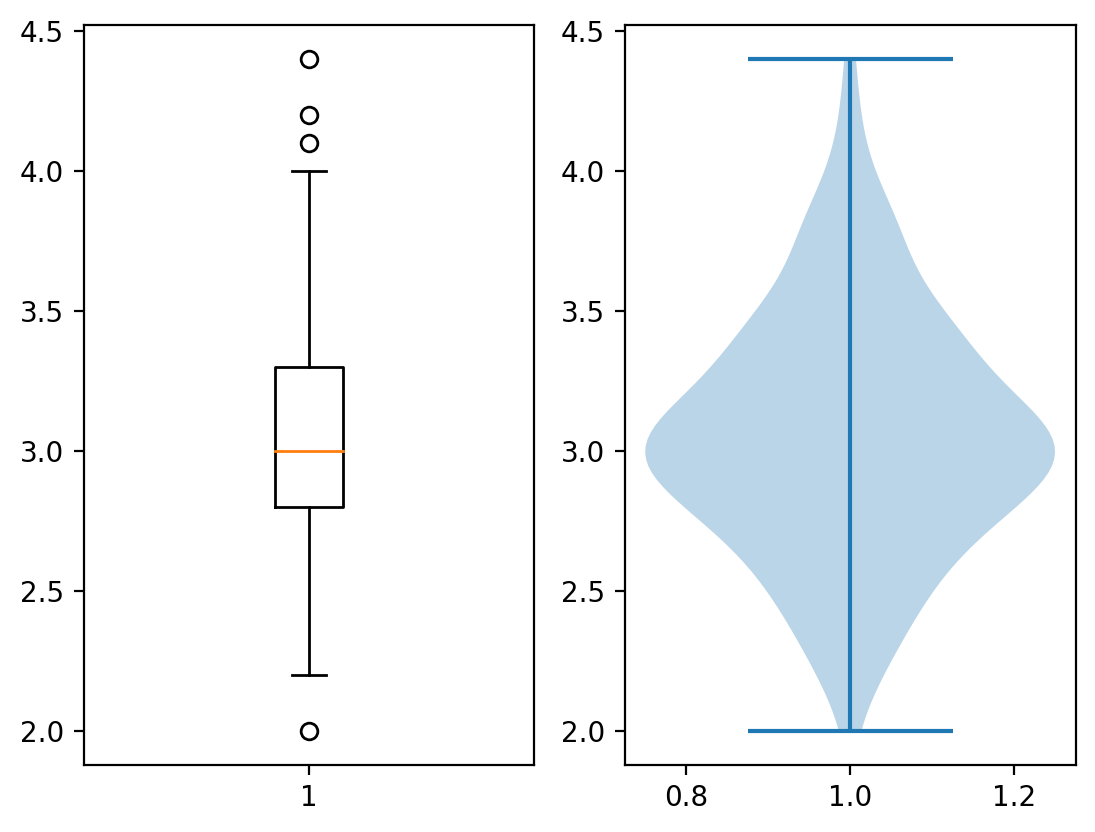

In [102]:
fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_width)
axes[1].violinplot(iris.sepal_width)
plt.show()

### 3)bar(),barh()  막대그래프 (x축,y축 뒤바뀌는것) , axvline(수직선),axhline(수평선)

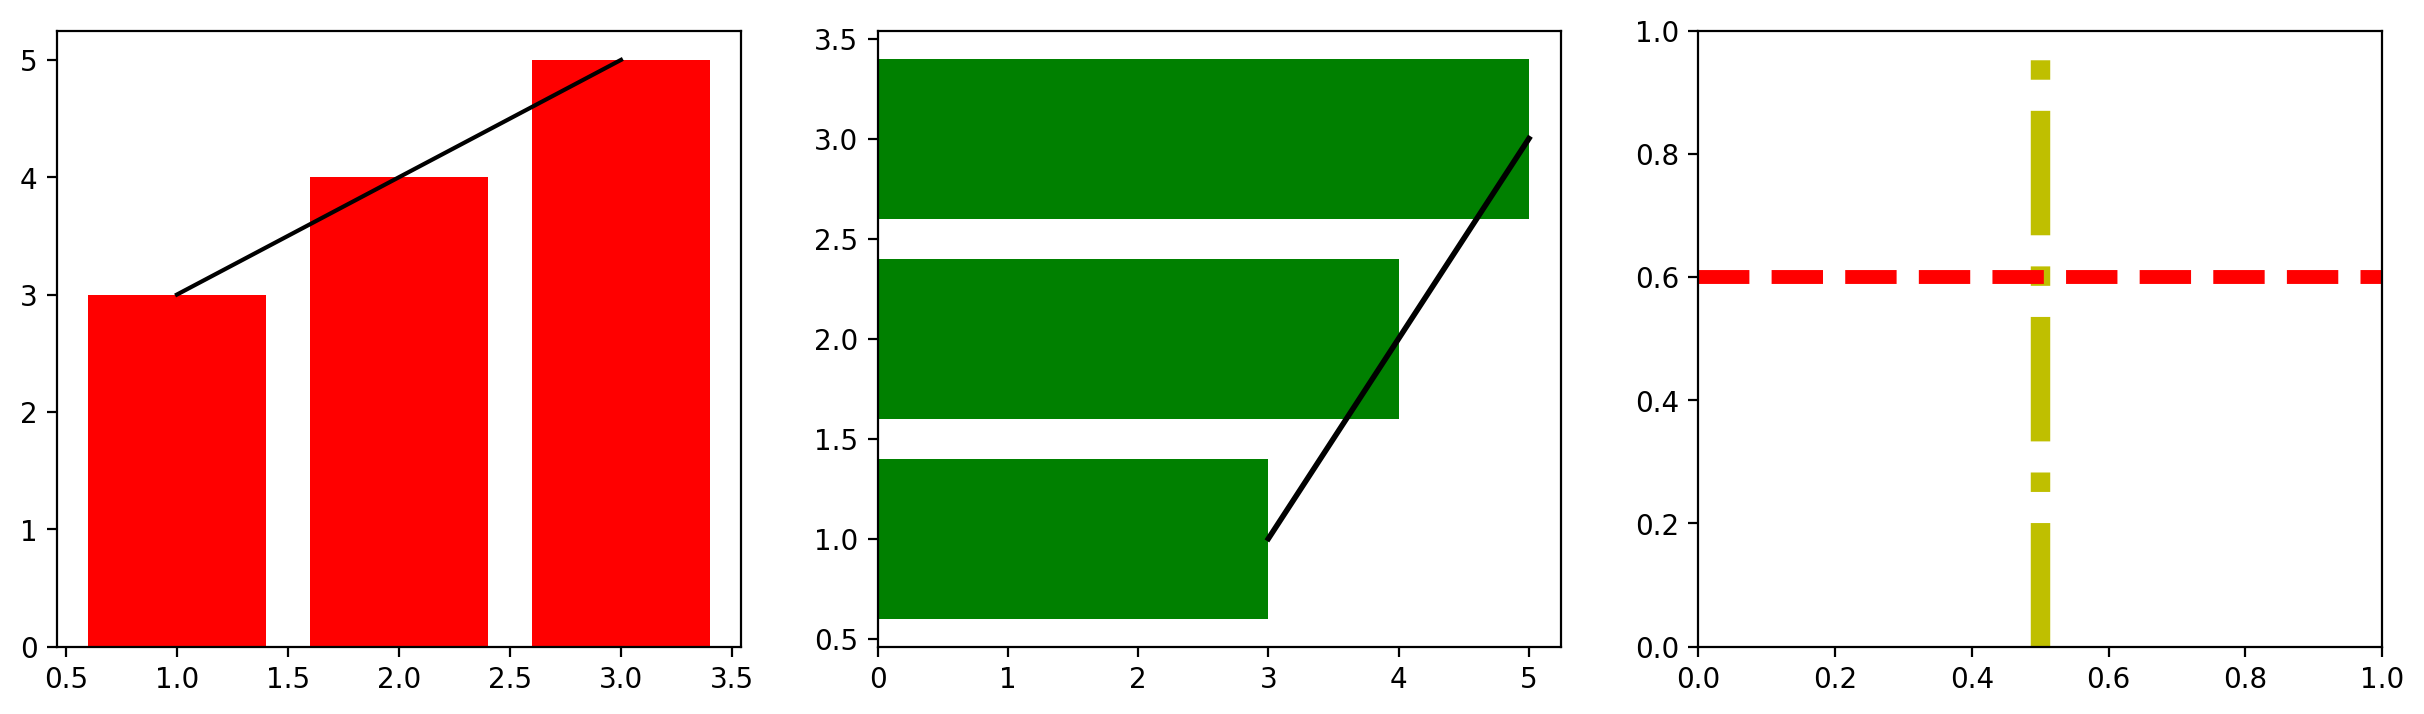

In [128]:
x=[1,2,3]
y=[3,4,5]
fig, axes = plt.subplots(ncols=3, figsize=(15,4))  # 1행 3열
axes[0].bar(x,y, color='r')
axes[0].plot(x,y,'k')
axes[1].barh(x,y, color='g')
axes[1].plot(y,x, 'k', linewidth=2)
axes[2].axvline(0.5, c='y', linewidth=7,linestyle='-.')
axes[2].axhline(0.6, c='r', linewidth=5, linestyle='--')
plt.show()

### 4) hist(도수분포표 histogram)

(array([ 4.,  5.,  7., 16.,  9.,  5., 13., 14., 10.,  6., 10., 16.,  7.,
        11.,  4.,  2.,  4.,  1.,  5.,  1.]),
 array([4.3 , 4.48, 4.66, 4.84, 5.02, 5.2 , 5.38, 5.56, 5.74, 5.92, 6.1 ,
        6.28, 6.46, 6.64, 6.82, 7.  , 7.18, 7.36, 7.54, 7.72, 7.9 ]),
 [<matplotlib.patches.Polygon at 0x22b1b1bc1c0>])

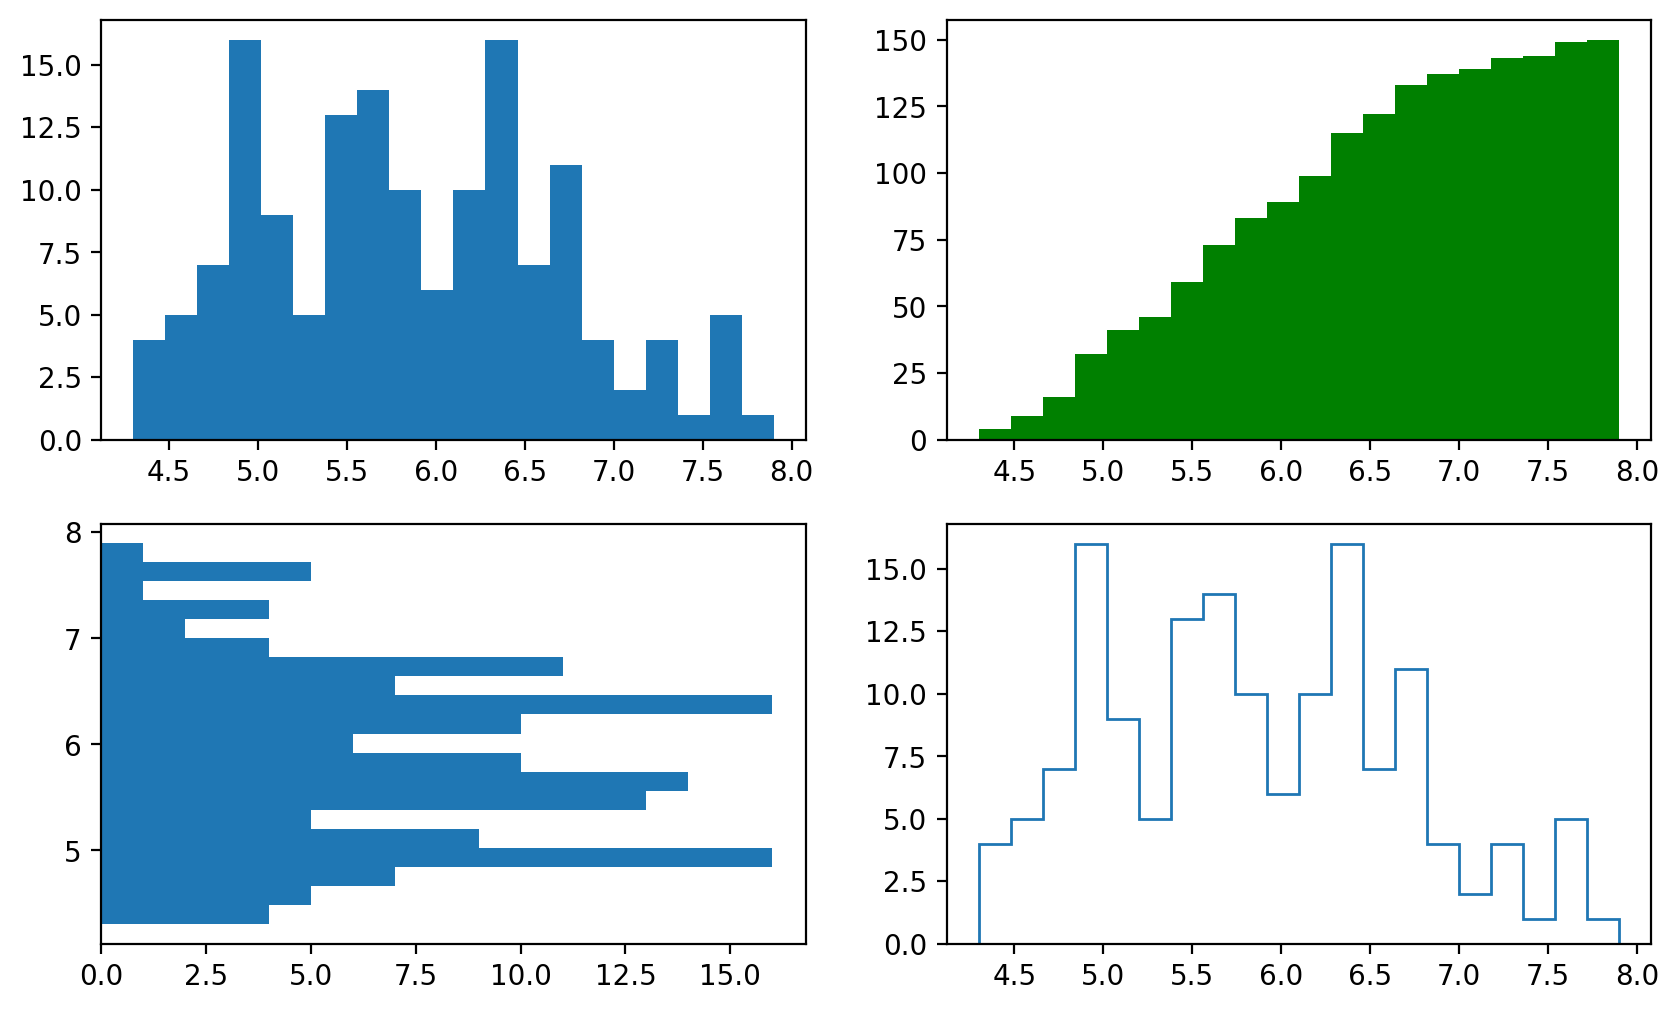

In [140]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=20) #히스토그램(도수분포표)
axes[0,1].hist(iris.sepal_length, bins=20, color='g', cumulative=True) #누적히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal' ) #수평히스토그램
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step')  #선형히스토그램

## 1.5 그래프 커스터마이징
### 1) linestyle, linewidth, color, marker... (plot에 매개변수를 지정)
### 2) text, annotate()

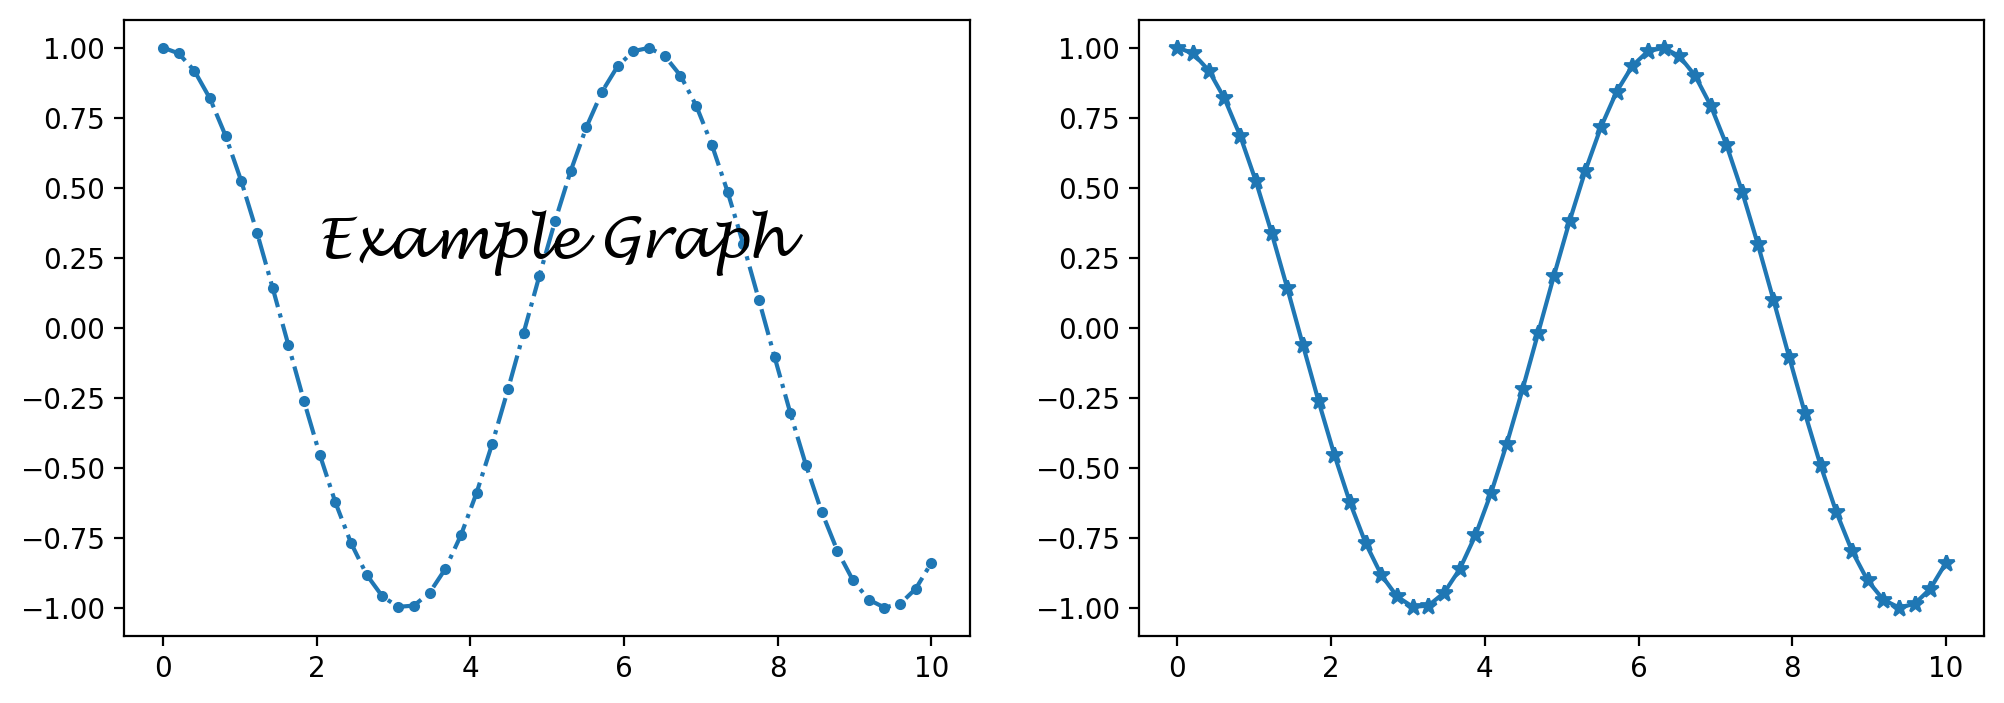

In [161]:
x = np.linspace(0,10,50) #0부터 10까지 50으로 나눠서 가져오기 / 50은 기본값
y = np.cos(x)

fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].plot(x,y, marker='.', linestyle='-.')
axes[1].plot(x,y, marker='*')
axes[0].text(2,0.25, 'Example Graph',  fontdict={'family': 'Lucida Handwriting', 'size': 20})
plt.show()